# IMA205 - Challenge 2024 

## Description of the Challenge: 
*[Link to the challenge](www.kaggle.com/competitions/ima205-challenge-2024/overview/description)*

### Introduction
A skin lesion is defined as a superficial growth or patch of the skin that is visually different and/or has a different texture than its surrounding area. Skin lesions, such as moles or birthmarks, can degenerate and become cancer, with melanoma being the deadliest skin cancer. Its incidence has increased during the last decades, especially in the areas mostly populated by white people.

The most effective treatment is an early detection followed by surgical excision. This is why several approaches for skin cancer detection have been proposed in the last years (non-invasive computer-aided diagnosis (CAD)).

### Goal of the challenge
The goal of this challenge is to classify dermoscopic images of skin lesions among eight different diagnostic classes:
1. Melanoma
2. Melanocytic nevus
3. Basal cell carcinoma
4. Actinic keratosis
5. Benign keratosis
6. Dermatofibroma
7. Vascular lesion
8. Squamous cell carcinoma
In order to do that, one will extract features such as the Asymmetry, the Border irregularity, the Colour and the Dimension of the lesion (usually called the ABCD rule). After that, one will use machine learning algorithms to classify the images.

### Data
one will use a data-set of 25331 dermoscopic images of skin lesions with, when available, their relative segmentation and metadata (age, sex and anatomical position). Data has already been randomly split into a training-validation set (75%) and a test set (25%). one only have the classification (made by clinicians) of the training-validation set. The goal of the project is to estimate the correct class of each dermoscopic image in the test set. **one can only use the data provided in this challenge**

### Feature extraction
one can use all features one'd like. A list of references describing very well-known features can be found at the end of this page but one can find many more articles in the Literature. one can use Pubmed, Google Scholar or simply Google to look for them. By using the network of Télécom Paris or its VPN , one will have automatically access to most of the scientific journals. If one have any trouble, do not hesitate to contact me, pietro.gori@telecom-paris.fr.

### Evaluation
The evaluation of the challenge will be based on 1) the ranking in the leaderboard (both private and public), 2) a report and 3) the quality of oner code.

The student, who will have the best ranking in the (private) leaderboard at the end of the challenge, will have between 2 and 4 points more in the final grade (depending on the result).

one will have to write a report where one will thoroughly explain the extraction of the features, the classification algorithms one used, why one chose them and the potential pre- and post-processing. one will have to explain the results saying if and why one expected those results. Be careful ! one will be penalised if one simply do a list of results like "I tried this algorithm but it did not work so I tried another one and so forth …" !!

Write a proper, commented and clean code in Python 3. I will test it and if it does not work one will have a penalty on the grade. Please write at the beginning of oner code the version of the libraries one used. one can write a set of functions with a main one - I will only run the main function - or a jupyter-notebook.

Everything, report and code, must be uploaded to E-campus in the section Challenge before the end of the challenge

### Metrics
As ranking metric, we will use the Weighted Categorization Accuracy which is defined as:
$$
WA=\frac{1}{N}\sum_{i=1}^{N}w_iI(y_i=f_i)
$$
such that
$$
\sum_{i=1}^{N}w_i=N
$$
in order to keep the maximum value equal to 1

where $y_i$ are ground truths, $f_i$ are the predicted results, and $w_i$ are the weights of the $i-th$ test image. If we make the hypothesis that we have $K$ groups - or classes - called $G={G_1,…,G_K}$ and we associate the same weight $w_t$ to all images of the same group $t$, we obtain that the weights are equal to: $w_t = \frac{ N }{ k |G_t|}$

In this way, we can take into account the imbalance nature of the data-set, if present.
Please note that the class weights in the test set are equal to:

<center>

| Class               | Weight      |
|---------------------|-------------|
| Melanoma            | 0.7005531   |
| Melanocytic nevus   | 0.24592265  |
| Basal cell carcinoma| 0.95261733  |
| Actinic keratosis   | 3.64804147  |
| Benign keratosis    | 1.20674543  |
| Dermatofibroma      | 13.19375    |
| Vascular lesion     | 12.56547619 |
| Squamous cell carcinoma | 5.04219745 |

</center>

### Methods
one must use Python 3 as programming language. I strongly suggest that one use numpy and scikit-learn.

one can use any pre-processing and post-processing - coded by one or correctly referenced in the report.

### References
- http://ieeexplore.ieee.org/document/918473/
- https://www.sciencedirect.com/science/article/pii/S0933365712001108#bib0180
- https://www.sciencedirect.com/science/article/pii/S0957417416302354#bib0023
- https://www.sciencedirect.com/science/article/pii/S0933365713001589
- https://www.nature.com/articles/nature21056
- https://hal-univ-bourgogne.archives-ouvertes.fr/hal-01250955/document
- https://workshop2021.isic-archive.com/
- https://workshop2020.isic-archive.com/#paper


## Libraries 

In [3]:
# Basic file and directory operations
import os
import shutil
import glob

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine learning and data science tools
import sklearn
from sklearn.cluster import KMeans                                                   # K-means clustering
from sklearn.decomposition import PCA                                                # Principal component analysis
from sklearn.manifold import TSNE                                                    # t-distributed stochastic neighbor embedding
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
from sklearn.model_selection import GridSearchCV, train_test_split                   # Model selection tools
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler        # Data preprocessing
from sklearn.svm import SVC                                                          # Support Vector Machine classifier
from sklearn.compose import ColumnTransformer                                        # To apply transformers to columns of data frames
from scipy.spatial import cKDTree                                                    # Data structure for quick nearest-neighbor lookup

# Image processing
import cv2
from PIL import Image
import matplotlib.image as mpimg  # Image loading for matplotlib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns  # Advanced visualization based on matplotlib

# Working with compressed files
import zipfile

# Deep learning
import torch
import torch.nn as nn  # Neural network module
import torch.optim as optim  # Optimization algorithms
import torchvision.datasets as datasets  # Datasets
import torchvision.models as models  # Pre-trained models
import torchvision.transforms as transforms  # Image transformations
from torch.utils.data import DataLoader, Dataset, random_split  # Data loading utility

# Datasets for image processing
from torchvision.datasets import ImageFolder  # Dataset for image folder structures

# Utilities for progress bars
from tqdm import tqdm  # Progress bar utility

# Miscellaneous
import random
import time  # Time access and conversions
import csv  # CSV file reading and writing

## Data paths and main information

### Directory labels and descriptions


The labels assigned to each directory serve primarily for organizational purposes, facilitating data management throughout the project pipeline. These labels are not central to the architecture of the project itself but are essential for efficient data handling and workflow management.

- **csv_files:** 
*Contains CSV files, likely storing metadata, annotations, or labels related to the images in the dataset.*

- **ipynb_files:**
*Holds Jupyter Notebook files (.ipynb) which are used for running Python code in the conda environment of the GPU's.*

- **Metadata:**
*This folder contains the metadata provided by the challenge.*

- **best_model2_resnet152.pth:**
*The final saved PyTorch model file. It is a trained ResNet-152 model for the image classification task.*

#### TEST FOLDERS

- **Test:**
*Test folder provided by the challenge. Contains the images and some masks.*

- **test_masks:**
*Stores the binary masks images mentioned before*

- **test_images:**
*Contains the original test images from the test folder used to evaluate the model's performance.*

- **test_images_OTSU:**
*Includes test images processed using the OTSU binarization method.*

- **test_images_segmented:**
*Contains test images that have been segmented, likely showing the target regions isolated from the background.*


##### TRAIN FOLDERS

- **Train:**
*Train folder provided by the challenge. Contains the images and some masks.*

- **train_masks:**
*Stores the binary masks images mentioned before*

- **train_images:**
*Contains the original train images from the test folder used to evaluate the model's performance.*

- **train_images_categorized:**
*Contains training images sorted into categories or classes. The subfolder structure is used to feed the ResNet model*

- **train_images_cropped:**
*Includes cropped versions of training images, focusing on regions of interest.*

- **train_images_OTSU:**
*Training images processed using OTSU thresholding, useful for separating foreground from background.*

- **train_images_OTSU_categorized:**
*OTSU processed training images sorted into categories or classes.*

- **train_images_segmented:**
*Segmented training images showing isolated regions of interest.*


- **csv_files:** 
*Contains CSV files, likely storing metadata, annotations, or labels related to the images in the dataset.*

- **ipynb_files:**
*Holds Jupyter Notebook files (.ipynb) which are used for running Python code in the conda environment of the GPU's.*

- **Metadata:**
*This folder contains the metadata provided by the challenge.*

- **best_model2_resnet152.pth:**
*The final saved PyTorch model file. It is a trained ResNet-152 model for the image classification task.*

#### TEST FOLDERS

- **Test:**
*Test folder provided by the challenge. Contains the images and some masks.*

- **test_masks:**
*Stores the binary masks images mentioned before*

- **test_images:**
*Contains the original test images from the test folder used to evaluate the model's performance.*

- **test_images_OTSU:**
*Includes test images processed using the OTSU binarization method.*

- **test_images_segmented:**
*Contains test images that have been segmented, likely showing the target regions isolated from the background.*


##### TRAIN FOLDERS

- **Train:**
*Train folder provided by the challenge. Contains the images and some masks.*

- **train_masks:**
*Stores the binary masks images mentioned before*

- **train_images:**
*Contains the original train images from the test folder used to evaluate the model's performance.*

- **train_images_categorized:**
*Contains training images sorted into categories or classes. The subfolder structure is used to feed the ResNet model*

- **train_images_cropped:**
*Includes cropped versions of training images, focusing on regions of interest.*

- **train_images_OTSU:**
*Training images processed using OTSU thresholding, useful for separating foreground from background.*

- **train_images_OTSU_categorized:**
*OTSU processed training images sorted into categories or classes.*

- **train_images_segmented:**
*Segmented training images showing isolated regions of interest.*

- *Classes for classification:*

1. *Melanoma*
2. *Melanocytic nevus*
3. *Basal cell carcinoma*
4. *Actinic keratosis*
5. *Benign keratosis*
6. *Dermatofibroma*
7. *Vascular lesion*
8. *Squamous cell carcinoma*

### Some data analysis of the provided dataset

In [18]:
# Paths to the training and test data
train_path = 'train/'
test_path = 'test/'

# Load the metadata for training and test sets
metadata_train = pd.read_csv('Metadata/metadataTrain.csv')
metadata_test = pd.read_csv('Metadata/metadataTest.csv')

# Display the first few rows of the training metadata
print("Training Metadata:")
display(metadata_train.head())

# Display the first few rows of the test metadata
print("\nTest Metadata:")
display(metadata_test.head())

Training Metadata:


,ID,CLASS,SEX,AGE,POSITION
0,ISIC_0028766,2,male,30.0,NaN
1,ISIC_0071222,8,male,85.0,lower extremity
2,ISIC_0069434,3,male,85.0,head/neck
3,ISIC_0062098,1,male,55.0,head/neck
4,ISIC_0057224,8,female,45.0,lower extremity



Test Metadata:


,ID,SEX,AGE,POSITION
0,ISIC_0055289,female,50.0,lower extremity
1,ISIC_0062682,male,65.0,lower extremity
2,ISIC_0057706,female,75.0,NaN
3,ISIC_0031702,male,70.0,head/neck
4,ISIC_0069272,male,60.0,lower extremity


In [19]:
# Describe the training metadata for numerical features
print("Training Metadata Statistics:")
print(metadata_train.describe())

# Describe the test metadata for numerical features
print("\nTest Metadata Statistics:")
print(metadata_test.describe())

Training Metadata Statistics:
              CLASS           AGE
count  18998.000000  18674.000000
mean       2.568323     53.991914
std        1.532728     18.094209
min        1.000000      0.000000
25%        2.000000     40.000000
50%        2.000000     55.000000
75%        3.000000     70.000000
max        8.000000     85.000000

Test Metadata Statistics:
               AGE
count  6220.000000
mean     54.138264
std      18.241916
min       0.000000
25%      40.000000
50%      55.000000
75%      70.000000
max      85.000000


*Distribution of classes:* 

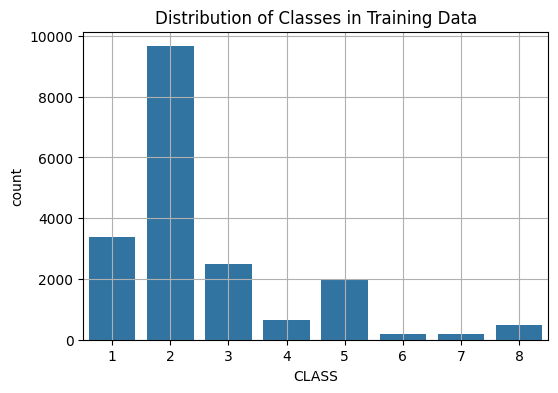

Maximum number of images in a class: 9657


In [20]:
plt.figure(figsize=(6, 4))  # Set the figure size

sns.countplot(x = 'CLASS', data=metadata_train)
plt.title('Distribution of Classes in Training Data')
plt.grid(True)  # Add grid lines
plt.show()

# Printing the maximum
print("Maximum number of images in a class:", metadata_train['CLASS'].value_counts().max())

The dataset exhibits a significant imbalance, particularly with a disproportionately large number of examples in the second class compared to others. This imbalance further intensifies for classes 6 and 7. To address this issue and ensure that our model learns to generalize well across all classes, a process of data augmentation is essential. Data augmentation will help in artificially balancing the dataset by generating additional training examples through various transformations, thereby improving the model's performance and robustness.

*Distribution of ages:*

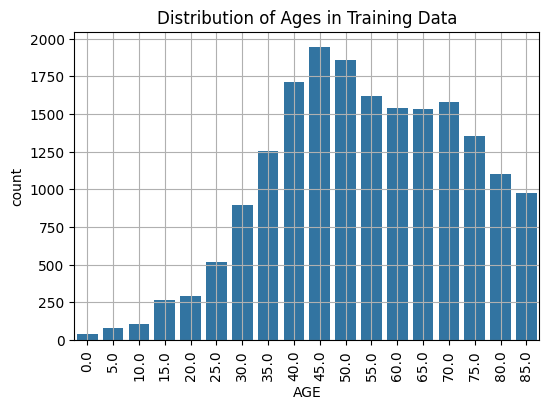

In [21]:
plt.figure(figsize=(6, 4))  # Set the figure size

sns.countplot(x='AGE', data=metadata_train)
plt.title('Distribution of Ages in Training Data')
plt.xticks(rotation = 90)  # This ensures that class labels don't overlap
plt.grid(True)  # Add grid lines
plt.show()

*Distribution of sex:*

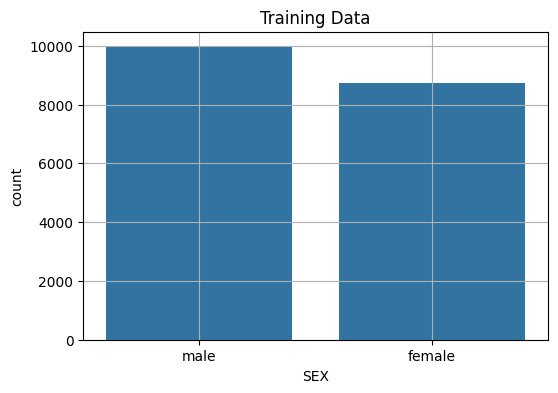

In [22]:
plt.figure(figsize=(6, 4))  # Set the figure size

sns.countplot(x='SEX', data=metadata_train)
plt.title('Training Data')
plt.grid(True)  # Add grid lines
plt.show()

*Checking the missing data:*

In [23]:
# Check for missing data in training metadata 
print("\nMissing Data in Training Metadata:")
missing_data_train = metadata_train.isnull().sum()
percentage_missing_train = (missing_data_train / len(metadata_train)) * 100
missing_data_train_with_percentage = pd.concat([missing_data_train, percentage_missing_train], axis=1, keys=['Missing Data', 'Percentage'])
print(missing_data_train_with_percentage)

# Check for missing data in test metadata
print("\nMissing Data in Test Metadata:")
missing_data_test = metadata_test.isnull().sum()
percentage_missing_test = (missing_data_test / len(metadata_test)) * 100
missing_data_test_with_percentage = pd.concat([missing_data_test, percentage_missing_test], axis=1, keys=['Missing Data', 'Percentage'])
print(missing_data_test_with_percentage)


Missing Data in Training Metadata:
          Missing Data  Percentage
ID                   0    0.000000
CLASS                0    0.000000
SEX                284    1.494894
AGE                324    1.705443
POSITION          1970   10.369513

Missing Data in Test Metadata:
          Missing Data  Percentage
ID                   0    0.000000
SEX                100    1.579030
AGE                113    1.784304
POSITION           661   10.437391


### Folder Handling

#### Class Mapping: labels to class names

In [24]:
class_labels = {
    1: 'Melanoma',
    2: 'Melanocytic nevus',
    3: 'Basal cell carcinoma',
    4: 'Actinic keratosis',
    5: 'Benign keratosis',
    6: 'Dermatofibroma',
    7: 'Vascular lesion',
    8: 'Squamous cell carcinoma'
}

In [25]:
def image_to_array(image_path):
    """Load an image from file and convert it to a NumPy array."""

    array_image = np.array( Image.open(image_path) )

    return array_image

#### Separating masks and images


In [26]:
# Paths for separate mask from the test and train folders
images_train_path = 'train_images/'
masks_train_path = 'train_masks/'

images_test_path = 'test_images/'
masks_test_path = 'test_masks/'

# Create the directories for the masks and images
os.makedirs(masks_train_path, exist_ok=True)
os.makedirs(masks_test_path, exist_ok=True)
os.makedirs(images_train_path, exist_ok=True)
os.makedirs(images_test_path, exist_ok=True)

In [27]:
# # Loop through the training metadata
# for i in range(len(metadata_train)):
#     # Get the ID and class of the current image
#     image_id = metadata_train.iloc[i]['ID']
    
#     # Get the paths to the image and mask
#     image_path = os.path.join(train_path, image_id + '.jpg')
#     mask_path = os.path.join(train_path, image_id + '_seg.png')
    
#     # Copy the image to the corresponding directory
#     shutil.copy(image_path, images_train_path)

#     # If the mask exists, copy it to the corresponding directory
#     if os.path.exists(mask_path):
#         shutil.copy(mask_path, masks_train_path)

# # Loop through the test metadata
# for i in range(len(metadata_test)):
#     # Get the ID and class of the current image
#     image_id = metadata_test.iloc[i]['ID']
    
#     # Get the paths to the image and mask
#     image_path = os.path.join(test_path, image_id + '.jpg')
#     mask_path = os.path.join(test_path, image_id + '_seg.png')
    
#     # Copy the image and mask to the corresponding directories
#     shutil.copy(image_path, images_test_path)

#     # If the mask exists, copy it to the corresponding directory
#     if os.path.exists(mask_path):
#         shutil.copy(mask_path, masks_test_path)

In [28]:
# Count the number of images and masks in the training and test directories
num_images_train = len(os.listdir(images_train_path))
num_images_test = len(os.listdir(images_test_path))
num_masks_train = len(os.listdir(masks_train_path))
num_masks_test = len(os.listdir(masks_test_path))

# Print the counts
print(f"Number of images in the training set: {num_images_train}")
print(f"Number of images in the test set: {num_images_test}")
print(f"Number of masks in the training set: {num_masks_train}")
print(f"Number of masks in the test set: {num_masks_test}")

Number of images in the training set: 18998
Number of images in the test set: 6333
Number of masks in the training set: 1945
Number of masks in the test set: 648


## Data preprocessing

### Image cropping:

The dataset includes some squared images taken through a circular lens, leading to the primary region of interest being confined within a central circle. To effectively focus our model on these areas, a specialized mask is employed to isolate this circular region. This mask is a binary image designed to emulate the lens pattern, with black regions in the rounded corners and a white central circle. 

Using this mask, we can establish correspondence with all images in the dataset and subsequently crop them based on a specified coefficient to ensure the model is trained primarily on the regions of interest. This technique enhances the precision of our image processing pipeline.

*Further details on this method are discussed in the accompanying article.*

Creating directories:

In [29]:
train_images_path = 'train_images'  
train_images_cropped_path = 'train_images_cropped'

test_images_path = 'test_images'  
test_images_cropped_path = 'test_images_cropped'

os.makedirs(train_images_path, exist_ok=True)
os.makedirs(train_images_cropped_path, exist_ok=True)
os.makedirs(test_images_path, exist_ok=True)
os.makedirs(test_images_cropped_path, exist_ok=True)

In [30]:
def create_circular_mask(diameter, padding=0):
    """
    Create a binary circular mask with the specified diameter and padding.

    Args:
        diameter (int): Diameter of the circle.
        padding (int): Padding around the circle.

    Returns:
        np.ndarray: A binary circular mask as a numpy array.
    """
    # Total size of the mask (including padding)
    size = diameter + 2 * padding
    # Create a square mask of the given size
    mask = np.zeros((size, size), dtype=np.uint8)
    # Define the center and radius of the circle
    center = (size // 2, size // 2)
    radius = diameter // 2
    # Draw the circle in the mask
    cv2.circle(mask, center, radius, (255,), thickness=-1)
    return mask


# Example usage of the mask (applying to an image)
def apply_mask(image, mask):
    return cv2.bitwise_and(image, image, mask=mask)

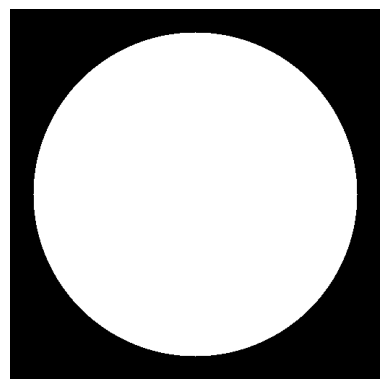

In [31]:
# Create a circular mask 
circular_mask = create_circular_mask(448, padding=32)

plt.imshow(circular_mask, cmap='gray')
plt.axis('off')
plt.show()

Obtaining a list of the squared images (512x512) px.

In [32]:
# Function to calculate coefficient of correspondence
def calculate_coefficient(main_image, template):
    
    # Normalize the template
    normalized_template = 1 - template / 255  # 1 for black, 0 for white
    
    # Apply the template to the main image
    result = np.sum(main_image * normalized_template)
    
    # Calculate the overall coefficient of correspondence
    overall_coefficient = 1 - result / (np.sum(normalized_template) * 255)  # Normalized between 0 and 1
    
    return overall_coefficient

In [33]:
# Initialize a list to store ID and coefficients
data_512_train = []
data_n512_train = []

# Iterate over images in the folder
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):  # Assuming all files are jpg images
        # Construct full path for each image
        full_path = os.path.join(train_images_path, filename)
        
        # Load the image
        image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image_id = os.path.splitext(filename)[0]  # Extract image ID from filename
            
            # Check if image dimensions match the circular_mask
            if image.shape[:2] == (512, 512):
                # Calculate coefficient of correspondence
                coefficient = calculate_coefficient(image, circular_mask)
                
                # Append ID and coefficient to the data list
                data_512_train.append({'ID': image_id, 'Coefficient': coefficient})
            else:
                data_n512_train.append(image_id)
        else:
            print(f"Failed to load image: {filename}")


In [34]:
# Convert the list to a DataFrame
df_train = pd.DataFrame(data_512_train)

# Save the DataFrame to a CSV file
df_train.to_csv('train_circled_coefficients.csv', index=False)

In [35]:
# Initialize a list to store ID and coefficients
data_512_test = []
data_n512_test = []

# Iterate over images in the folder
for filename in os.listdir(test_images_path):
    if filename.endswith('.jpg'):  # Assuming all files are jpg images
        # Construct full path for each image
        full_path = os.path.join(test_images_path, filename)
        
        # Load the image
        image = cv2.imread(full_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image_id = os.path.splitext(filename)[0]  # Extract image ID from filename
            
            # Check if image dimensions match the circular_mask
            if image.shape[:2] == (512, 512):
                # Calculate coefficient of correspondence
                coefficient = calculate_coefficient(image, circular_mask)
                
                # Append ID and coefficient to the data list
                data_512_test.append({'ID': image_id, 'Coefficient': coefficient})
            else:
                data_n512_test.append(image_id)
        else:
            print(f"Failed to load image: {filename}")


In [36]:
# Convert the list to a DataFrame
df_test = pd.DataFrame(data_512_test)

# Save the DataFrame to a CSV file
df_test.to_csv('test_circled_coefficients.csv', index=False)

Computing the coefficient of correspondance and cropping according to this value:

In [37]:
def process_image(row, images_path, output_folder):
    """Process a single image: check conditions and crop if applicable."""
    image_id = f"{row['ID']}.jpg"
    source_path = os.path.join(images_path, image_id)
    
    # Check if the source image exists
    if not os.path.exists(source_path):
        print(f"Source image {image_id} does not exist")
        return
    
    # Read the image
    image = cv2.imread(source_path, cv2.IMREAD_COLOR)
    
    # Determine cropping parameters based on the coefficient
    if row['Coefficient'] > 0.95:
        crop_size = 106
    elif row['Coefficient'] > 0.6:
        crop_size = 76
    else:
        crop_size = 0
    
    # Define the cropping region
    crop_left = crop_size
    crop_right = image.shape[1] - crop_size
    crop_top = crop_size
    crop_bottom = image.shape[0] - crop_size
    
    # Crop the image
    cropped_image = image[crop_top:crop_bottom, crop_left:crop_right]
    
    # Save the cropped image
    destination_path = os.path.join(output_folder, image_id)
    cv2.imwrite(destination_path, cropped_image)
    print(f"Cropped image {image_id} saved to {output_folder}")

def process_all_images(df, images_path, output_folder):
    """Iterate over DataFrame rows and process each image."""
    for index, row in df.iterrows():
        process_image(row, images_path, output_folder)

Cropping when needed.

In [45]:
# Cropping the images
process_all_images(df_train, train_images_path, train_images_cropped_path)
process_all_images(df_test, test_images_path, test_images_cropped_path)

Cropped image ISIC_0070995.jpg saved to train_images_cropped
Cropped image ISIC_0059069.jpg saved to train_images_cropped
Cropped image ISIC_0062047.jpg saved to train_images_cropped
Cropped image ISIC_0071872.jpg saved to train_images_cropped
Cropped image ISIC_0071400.jpg saved to train_images_cropped
Cropped image ISIC_0063607.jpg saved to train_images_cropped
Cropped image ISIC_0072515.jpg saved to train_images_cropped
Cropped image ISIC_0053645.jpg saved to train_images_cropped
Cropped image ISIC_0061152.jpg saved to train_images_cropped
Cropped image ISIC_0054588.jpg saved to train_images_cropped
Cropped image ISIC_0063266.jpg saved to train_images_cropped
Cropped image ISIC_0058248.jpg saved to train_images_cropped
Cropped image ISIC_0070186.jpg saved to train_images_cropped
Cropped image ISIC_0059408.jpg saved to train_images_cropped
Cropped image ISIC_0053583.jpg saved to train_images_cropped
Cropped image ISIC_0061941.jpg saved to train_images_cropped
Cropped image ISIC_00569

The 'train_images_cropped' and 'test_images_cropped' folder are set up to streamline our data preparation. It will contain images either cropped to highlight regions of interest or the original images if no cropping is necessary. 

In [46]:
# Train verification
cropped_train_images = [f for f in os.listdir('train_images_cropped') if f.endswith(('.png', '.jpg', '.jpeg'))]

num_cropped_images = len(cropped_train_images)
print(f"Number of cropped images: {num_cropped_images}")

Number of cropped images: 18998


In [47]:
# Test verification
cropped_test_images = [f for f in os.listdir('test_images_cropped') if f.endswith(('.png', '.jpg', '.jpeg'))]

num_cropped_images = len(cropped_test_images)
print(f"Number of cropped images: {num_cropped_images}")

Number of cropped images: 6333


In [48]:
# Copy images train
for image_id in data_n512_train:
    source_path = os.path.join(train_images_path, f"{image_id}.jpg")
    destination_path = os.path.join(train_images_cropped_path, f"{image_id}.jpg")
    
    # Check if the source image exists before attempting to copy
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
        print(f"Successfully copied {image_id}.jpg to {train_images_cropped_path}")
    else:
        print(f"Image {image_id}.jpg does not exist in {train_images_path}")

Successfully copied ISIC_0031987.jpg to train_images_cropped
Successfully copied ISIC_0031252.jpg to train_images_cropped
Successfully copied ISIC_0010102.jpg to train_images_cropped
Successfully copied ISIC_0030860.jpg to train_images_cropped
Successfully copied ISIC_0028039.jpg to train_images_cropped
Successfully copied ISIC_0033975.jpg to train_images_cropped
Successfully copied ISIC_0032892.jpg to train_images_cropped
Successfully copied ISIC_0029679.jpg to train_images_cropped
Successfully copied ISIC_0012657.jpg to train_images_cropped
Successfully copied ISIC_0032347.jpg to train_images_cropped
Successfully copied ISIC_0027958.jpg to train_images_cropped
Successfully copied ISIC_0030073.jpg to train_images_cropped
Successfully copied ISIC_0031194.jpg to train_images_cropped
Successfully copied ISIC_0031633.jpg to train_images_cropped
Successfully copied ISIC_0029218.jpg to train_images_cropped
Successfully copied ISIC_0032081.jpg to train_images_cropped
Successfully copied ISIC

In [49]:
# Copy images test
for image_id in data_n512_test:
    source_path = os.path.join(test_images_path, f"{image_id}.jpg")
    destination_path = os.path.join(test_images_cropped_path, f"{image_id}.jpg")
    
    # Check if the source image exists before attempting to copy
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
        print(f"Successfully copied {image_id}.jpg to {test_images_cropped_path}")
    else:
        print(f"Image {image_id}.jpg does not exist in {test_images_path}")

Successfully copied ISIC_0014558.jpg to test_images_cropped
Successfully copied ISIC_0030156.jpg to test_images_cropped
Successfully copied ISIC_0012313.jpg to test_images_cropped
Successfully copied ISIC_0030945.jpg to test_images_cropped
Successfully copied ISIC_0026189.jpg to test_images_cropped
Successfully copied ISIC_0013695.jpg to test_images_cropped
Successfully copied ISIC_0033422.jpg to test_images_cropped
Successfully copied ISIC_0013644.jpg to test_images_cropped
Successfully copied ISIC_0030241.jpg to test_images_cropped
Successfully copied ISIC_0027379.jpg to test_images_cropped
Successfully copied ISIC_0031559.jpg to test_images_cropped
Successfully copied ISIC_0034207.jpg to test_images_cropped
Successfully copied ISIC_0026000.jpg to test_images_cropped
Successfully copied ISIC_0016042.jpg to test_images_cropped
Successfully copied ISIC_0025574.jpg to test_images_cropped
Successfully copied ISIC_0025906.jpg to test_images_cropped
Successfully copied ISIC_0028886.jpg to 

In [50]:
# Get the list of image files in each directory
cropped_train_images = [f for f in os.listdir('train_images_cropped') if f.endswith(('.png', '.jpg', '.jpeg'))]

num_cropped_images = len(cropped_train_images)

print(f"Number of cropped images - train: {num_cropped_images}")

Number of cropped images - train: 18998


In [51]:
# Get the list of image files in each directory
cropped_test_images = [f for f in os.listdir('test_images_cropped') if f.endswith(('.png', '.jpg', '.jpeg'))]

num_cropped_images = len(cropped_test_images)

print(f"Number of cropped images - test: {num_cropped_images}")

Number of cropped images - test: 6333


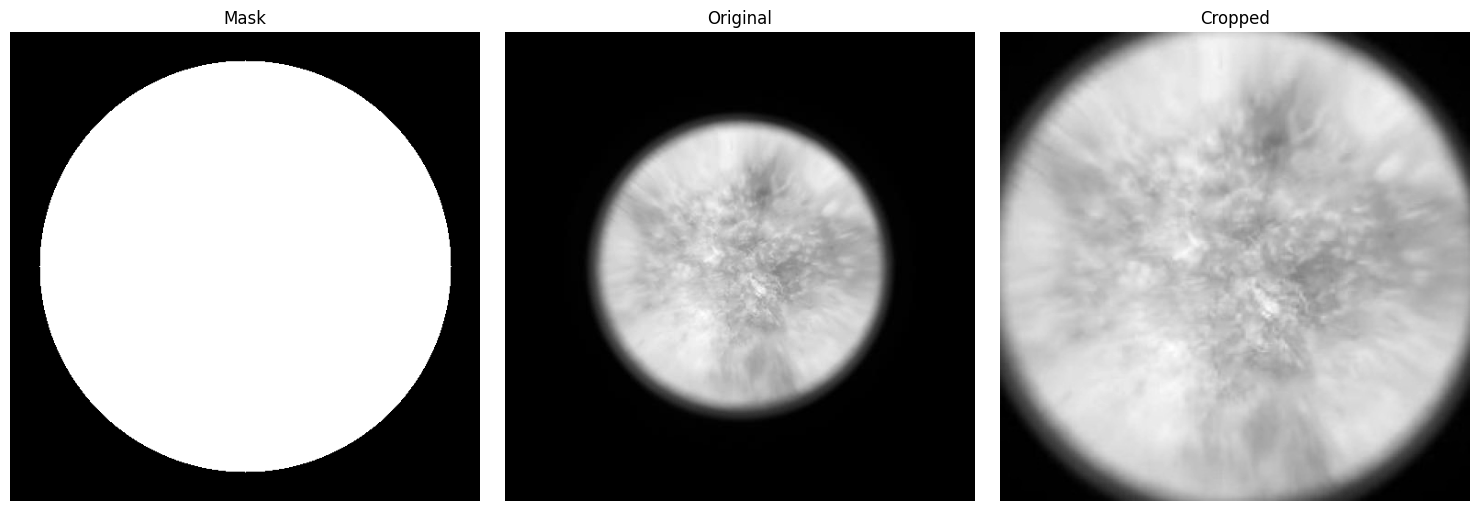

In [60]:
# Paths to the images (replace with your actual paths)
image_path_1 = 'test_images/ISIC_0065481.jpg'
image_path_2 = 'test_images_cropped/ISIC_0065481.jpg'

# Read the images
image1 = cv2.imread(image_path_1, cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread(image_path_2, cv2.IMREAD_GRAYSCALE)

# Check if the images were successfully loaded
if image1 is None or image2 is None:
    raise ValueError("One or more images could not be loaded. Please check the file paths.")

# Plot the images in a 1x3 grid
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(circular_mask, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Mask')

axs[1].imshow(image1, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Original')

axs[2].imshow(image2, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Cropped')

plt.tight_layout()
plt.show()

### OTSU Thresholding

OTSU thresholding is an effective image processing technique for automatically converting grayscale images into binary form by distinguishing the foreground from the background. It accomplishes this by analyzing the histogram of the image to find a threshold that minimizes the variance within each class while maximizing the variance between classes. This method is particularly advantageous when the image features two distinct pixel classes, such as in medical imaging where it can differentiate between affected and healthy tissue.

Following the cropping process described earlier, where background elements outside the lens are removed, OTSU thresholding becomes even more valuable. It helps to further clarify and enhance the distinction between significant features, such as skin and lesions, rather than simply differentiating between the lens boundaries and the interior. This refined focus aids in improving the accuracy of subsequent image analysis and model training tasks.

*Further insights on this application are provided in the associated article.*

In [61]:
# Function to apply Otsu's thresholding
def apply_otsu_thresholding(image_path, target_path):
    # Read the image in grayscale mode
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Check if image is loaded
    if image is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    # Apply Otsu's thresholding
    _, th_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Save the thresholded image
    cv2.imwrite(target_path, th_image)

Applying the thresholding and segmenting the train images:

In [62]:
src_directory = 'train_images_cropped'
target_directory = 'train_images_OTSU'

# Create the target directory if it doesn't exist
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

In [63]:
# Initialize a counter
processed_count = 0

# Apply Otsu's thresholding to each image in the source directory
for filename in os.listdir(src_directory):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.tif')):
        file_path = os.path.join(src_directory, filename)
        target_path = os.path.join(target_directory, filename)
        apply_otsu_thresholding(file_path, target_path)
        print(f"Processed {filename}")
        processed_count += 1  # Increment the counter

print(f"Otsu's thresholding applied to {processed_count} images.")

Processed ISIC_0066028.jpg
Processed ISIC_0030911.jpg
Processed ISIC_0070496.jpg
Processed ISIC_0031323.jpg
Processed ISIC_0067668.jpg
Processed ISIC_0031484.jpg
Processed ISIC_0000521.jpg
Processed ISIC_0029708.jpg
Processed ISIC_0073224.jpg
Processed ISIC_0032591.jpg
Processed ISIC_0012726.jpg
Processed ISIC_0024688.jpg
Processed ISIC_0060663.jpg
Processed ISIC_0033476.jpg
Processed ISIC_0033804.jpg
Processed ISIC_0013166.jpg
Processed ISIC_0028148.jpg
Processed ISIC_0031742.jpg
Processed ISIC_0062557.jpg
Processed ISIC_0062925.jpg
Processed ISIC_0063317.jpg
Processed ISIC_0066449.jpg
Processed ISIC_0058339.jpg
Processed ISIC_0030102.jpg
Processed ISIC_0010860.jpg
Processed ISIC_0060202.jpg
Processed ISIC_0069949.jpg
Processed ISIC_0013975.jpg
Processed ISIC_0072005.jpg
Processed ISIC_0028529.jpg
Processed ISIC_0032657.jpg
Processed ISIC_0000140.jpg
Processed ISIC_0029369.jpg
Processed ISIC_0053880.jpg
Processed ISIC_0025478.jpg
Processed ISIC_0032686.jpg
Processed ISIC_0073133.jpg
P

In [64]:
# Get a list of processed image file names
processed_image_files = [f for f in os.listdir(target_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

In [65]:
# Get the list of image files in each directory
original_image_files = [f for f in os.listdir(src_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
mask_image_files = [f for f in os.listdir(target_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Count the number of image files in each directory
num_original_images = len(original_image_files)
num_mask_images = len(mask_image_files)

print(f"Number of original images: {num_original_images}")
print(f"Number of mask images: {num_mask_images}")

Number of original images: 18998
Number of mask images: 18998


Applying the thresholding and segmenting the test images:

In [73]:
# Define the directories
src_directory = 'test_images_cropped'
target_directory = 'test_images_OTSU'
output_directory = 'test_images_segmented'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Get the list of image files from the source directory
src_files = [f for f in os.listdir(src_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
if not src_files:
    raise ValueError("No image files found in the source directory.")

# Process each image
for src_filename in src_files:
    # Assume mask file has the same name as the image file; adjust if the system is different
    mask_filename = src_filename

    image_path = os.path.join(src_directory, src_filename)
    mask_path = os.path.join(target_directory, mask_filename)
    output_path = os.path.join(output_directory, src_filename)

    # Read the image and mask
    image = cv2.imread(image_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"Skipping {src_filename}: Image not found.")
        continue
    if mask is None:
        print(f"Skipping {mask_filename}: Mask not found.")
        continue

    # Check if the mask needs resizing to match the image size
    if mask.shape != image.shape[:2]:
        print(f"Resizing mask for {src_filename} to match the image size.")
        mask = cv2.resize(mask, (image.shape[1], image.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Invert the mask
    mask_inverted = 255 - mask

    # Apply the mask
    segmented_image = cv2.bitwise_and(image, image, mask=mask_inverted)

    # Save the segmented image
    cv2.imwrite(output_path, segmented_image)
    print(f"Processed and saved: {output_path}")


Processed and saved: test_images_segmented/ISIC_0024727.jpg
Processed and saved: test_images_segmented/ISIC_0029100.jpg
Processed and saved: test_images_segmented/ISIC_0070539.jpg
Processed and saved: test_images_segmented/ISIC_0031959.jpg
Processed and saved: test_images_segmented/ISIC_0054690.jpg
Processed and saved: test_images_segmented/ISIC_0054137.jpg
Processed and saved: test_images_segmented/ISIC_0068901.jpg
Processed and saved: test_images_segmented/ISIC_0024346.jpg
Processed and saved: test_images_segmented/ISIC_0065881.jpg
Processed and saved: test_images_segmented/ISIC_0069333.jpg
Processed and saved: test_images_segmented/ISIC_0057443.jpg
Processed and saved: test_images_segmented/ISIC_0015544.jpg
Processed and saved: test_images_segmented/ISIC_0055316.jpg
Processed and saved: test_images_segmented/ISIC_0034162.jpg
Processed and saved: test_images_segmented/ISIC_0055460.jpg
Processed and saved: test_images_segmented/ISIC_0026365.jpg
Processed and saved: test_images_segment

In [74]:
files = [f for f in os.listdir(output_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

num_original_images = len(files)

print(f"Number of original images: {num_original_images}")

Number of original images: 6333


Visualization of the segmentation:

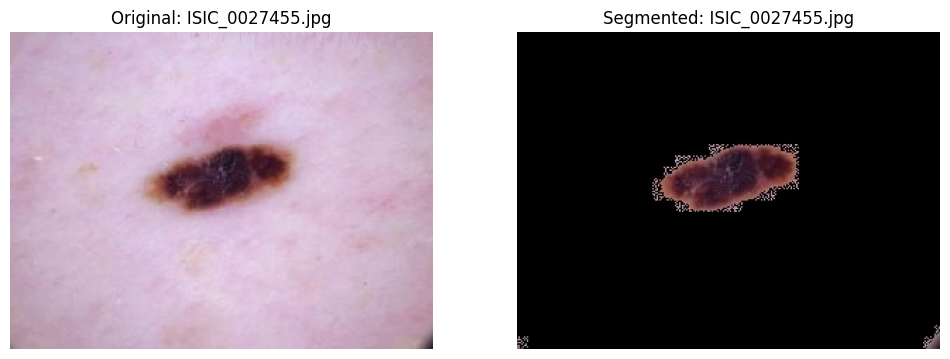

In [80]:
# Define the directories for the original and segmented images
original_directory = 'train_images_cropped'
segmented_directory = 'train_images_segmented'

# Ensure the directories contain the correct images
original_files = [f for f in os.listdir(original_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
segmented_files = [f for f in os.listdir(segmented_directory) if f.endswith(('.png', '.jpg', '.jpeg'))]

if not original_files or not segmented_files:
    raise ValueError("The directories must contain at least one image.")

# Randomly select one pair of images
selected_filename = random.choice(original_files)

# Ensure that the corresponding segmented image exists
if selected_filename not in segmented_files:
    raise ValueError(f"No matching segmented image found for {selected_filename}.")

# Build the paths to the original and segmented image files
original_image_path = os.path.join(original_directory, selected_filename)
segmented_image_path = os.path.join(segmented_directory, selected_filename)

# Load the original and segmented images
original_image = cv2.imread(original_image_path)
segmented_image = cv2.imread(segmented_image_path)

if original_image is None or segmented_image is None:
    raise ValueError(f"Images not found for {selected_filename}.")

# Convert images from BGR to RGB for correct plotting
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

# Plot the images in a 1x2 grid
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(original_image_rgb)
axs[0].set_title(f'Original: {selected_filename}')
axs[0].axis('off')

axs[1].imshow(segmented_image_rgb)
axs[1].set_title(f'Segmented: {selected_filename}')
axs[1].axis('off')

plt.show()

### Data augmentation: 

Data augmentation is a technique that enhances the diversity of the training dataset by applying transformations such as resizing, cropping, and normalization. This process generates new image variations, improving the model's generalization ability and performance by exposing it to a wider range of visual conditions.

Before the process of data augmentation is necessary to split the segmented data in validation and training. 

In [81]:
# Path to the CSV file
csv_path = 'Metadata/metadataTrain.csv'
# Path to the images directory
images_path = 'train_images_cropped'
# Destination paths
train_dir = 'res2_train_images_categorized'
val_dir = 'res2_validation_images_categorized'

# Load your CSV file
df = pd.read_csv(csv_path)

In [95]:
# Create directories for training and validation, for each class
classes = df['CLASS'].unique()
for class_label in classes:
    os.makedirs(os.path.join(train_dir, str(class_label)), exist_ok=True)
    os.makedirs(os.path.join(val_dir, str(class_label)), exist_ok=True)

# Split the data
# Define the size of the validation set
val_size = 0.2  # 20% for validation, 80% for training
train_df, val_df = train_test_split(df, test_size=val_size, stratify=df['CLASS'])

# Function to copy images to the designated directories
def copy_images(df, dest_dir):
    for index, row in df.iterrows():
        file_name = f"{row['ID']}.jpg"  # Assuming the images are in jpg format
        class_folder = os.path.join(dest_dir, str(row['CLASS']))
        image_path = os.path.join(images_path, file_name)
        shutil.copy(image_path, class_folder)

# Copy images to their respective directories
copy_images(train_df, train_dir)
copy_images(val_df, val_dir)

In [96]:
def count_files(directory):
    for root, dirs, files in os.walk(directory):
        print(f"There are {len(files)} files in the directory {root}")
        for subdirectory in dirs:
            sub_path = os.path.join(root, subdirectory)
            sub_files = os.listdir(sub_path)
            print(f"There are {len(sub_files)} files in the subdirectory {sub_path}")

In [97]:
count_files(train_dir)

There are 0 files in the directory res2_train_images_categorized
There are 152 files in the subdirectory res2_train_images_categorized/7
There are 520 files in the subdirectory res2_train_images_categorized/4
There are 1994 files in the subdirectory res2_train_images_categorized/3
There are 2713 files in the subdirectory res2_train_images_categorized/1
There are 143 files in the subdirectory res2_train_images_categorized/6
There are 377 files in the subdirectory res2_train_images_categorized/8
There are 7725 files in the subdirectory res2_train_images_categorized/2
There are 1574 files in the subdirectory res2_train_images_categorized/5
There are 152 files in the directory res2_train_images_categorized/7
There are 520 files in the directory res2_train_images_categorized/4
There are 1994 files in the directory res2_train_images_categorized/3
There are 2713 files in the directory res2_train_images_categorized/1
There are 143 files in the directory res2_train_images_categorized/6
There ar

In [98]:
count_files(val_dir)

There are 0 files in the directory res2_validation_images_categorized
There are 498 files in the subdirectory res2_validation_images_categorized/3
There are 130 files in the subdirectory res2_validation_images_categorized/4
There are 38 files in the subdirectory res2_validation_images_categorized/7
There are 394 files in the subdirectory res2_validation_images_categorized/5
There are 1932 files in the subdirectory res2_validation_images_categorized/2
There are 94 files in the subdirectory res2_validation_images_categorized/8
There are 36 files in the subdirectory res2_validation_images_categorized/6
There are 678 files in the subdirectory res2_validation_images_categorized/1
There are 498 files in the directory res2_validation_images_categorized/3
There are 130 files in the directory res2_validation_images_categorized/4
There are 38 files in the directory res2_validation_images_categorized/7
There are 394 files in the directory res2_validation_images_categorized/5
There are 1932 files 

Applying transtormations to balance the number of data per class:

In [99]:
class AugmentDataset(datasets.ImageFolder):
    def __init__(self, root, transform=None, target_transform=None, factors=None):
        super().__init__(root, transform=transform, target_transform=target_transform)
        self.factors = factors

    def __getitem__(self, index):
        path, target = self.samples[index]
        sample = self.loader(path)
        if self.transform is not None:
            # Generate factor-1 augmented images because one is the original
            samples = [sample] + [self.transform(sample) for _ in range(self.factors[target] - 1)]
        else:
            samples = [sample for _ in range(self.factors[target])]
        if self.target_transform is not None:
            targets = [self.target_transform(target) for _ in range(self.factors[target])]
        else:
            targets = [target for _ in range(self.factors[target])]

        return samples, targets, path

def save_augmented_images(dataset, save_dir):
    for i, (samples, targets, path) in enumerate(dataset):
        class_path = dataset.classes[targets[0]]  # Assuming all targets are the same in the list
        class_dir = os.path.join(save_dir, class_path)
        os.makedirs(class_dir, exist_ok=True)
        basename = os.path.basename(path)  # Get the original file name
        name, ext = os.path.splitext(basename)  # Separate the file name and extension
        for j, img in enumerate(samples):
            if isinstance(img, torch.Tensor):
                img = transforms.ToPILImage()(img)
            if j == 0:
                img_save_path = os.path.join(class_dir, f'{name}{ext}')  # Save the original image first
            else:
                img_save_path = os.path.join(class_dir, f'{name}_aug{j}{ext}')  # Save augmented images
            img.save(img_save_path)

In [100]:
# Augmentation transforms
augment_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor()
])

# Define the factors as a dictionary, where key is class index and value is the factor
factors = {0: 2, 1: 1, 2: 3, 3: 14, 4: 4, 5: 54, 6: 50, 7: 20}

In [ ]:
# Create the augmented dataset
train_images_path = 'res2_train_images_categorized'
augmented_dataset = AugmentDataset(root=train_images_path, transform=augment_transforms, factors=factors)

# Save the augmented images
save_augmented_images(augmented_dataset, 'res2_train_images_augmented')

In [101]:
count_files('res2_train_images_augmented')


## Training the Model

### ResNet-152 and Skin Lesion Classification Challenge:


**ResNet-152** is part of the Residual Network (ResNet) family, which was introduced by Microsoft in 2015 in their paper titled "Deep Residual Learning for Image Recognition." This model architecture was a breakthrough in how neural networks are designed and was pivotal in addressing the problem of vanishing gradients—a challenge that often occurred in very deep networks.

#### Key Features of ResNet-152:

1. **Deep Learning Capabilities:**
   - ResNet-152’s deep architecture, comprising 152 layers, is exceptionally well-suited for handling the complexities of dermatoscopic images. Each layer helps in extracting intricate features from the images, which is crucial for identifying subtle variations in skin lesions that could indicate different types of skin conditions or cancers.

2. **Residual Blocks for Effective Training:**
   - The incorporation of residual blocks in ResNet-152 allows for the effective training of deep networks by facilitating the flow of gradients. This feature is vital for learning from a large dataset of 25,331 images, as it prevents the degradation of learning capability in deeper layers, thus maintaining the model's performance even with the depth required for high accuracy.

3. **Feature Extraction for ABCD Rule Application:**
   - Using ResNet-152, one can extract detailed features related to the Asymmetry, Border irregularity, Color, and Dimension of the lesions—critical aspects under the ABCD rule for melanoma detection. The model’s ability to discern these features supports accurate classification of lesions into one of the eight diagnostic categories.

4. **Handling Diverse Data:**
   - The challenge involves classifying images into multiple categories of skin lesions, where each category may exhibit distinct visual characteristics. ResNet-152's capacity to generalize from complex patterns makes it adept at differentiating between these categories effectively, even when trained on a dataset with varied and nuanced features.

5. **Pre-training and Fine-tuning:**
   - Utilizing ResNet-152 with pre-trained weights on large-scale datasets like ImageNet before fine-tuning on the specific dermatoscopic images can significantly enhance the learning process. This approach leverages learned patterns from a broader context, which can be refined to the nuances of skin lesion images, optimizing performance on the classification tasks specified in the challenge.

GPU check:

In [ ]:
if torch.cuda.is_available():
    # If CUDA is available, check the details of the first GPU (index 0)
    gpu_properties = torch.cuda.get_device_properties(0)
    print(f"GPU Name: {gpu_properties.name}")
    print(f"Total memory: {gpu_properties.total_memory / 1024**3:.2f} GB")
else:
    print("CUDA is not available. Using CPU instead.")

In [ ]:
# Check if CUDA is available and set the device accordingly
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Loading the pretrained model:

In [ ]:
# Load a pre-trained ResNet-152 model
model = models.resnet152(pretrained=True)

# Modify the final fully connected layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 8)  # Assuming you have 8 classes

In [ ]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the images to 256x256
    transforms.CenterCrop(224),     # Crop the images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Load your dataset
train_dataset = datasets.ImageFolder(root='res2_train_images_augmented', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Validation set (make sure to provide the correct path and transformations)
val_dataset = datasets.ImageFolder(root='res2_validation_images_categorized', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Optionally, define a learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
# Move the model to the designated device (GPU or CPU)
model = model.to(device)

Training the model:

In [ ]:
num_epochs = 20  # Adjust based on the early stopping
best_val_loss = np.inf
patience = 5  # Patience for early stopping
wait = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch')

    for images, labels in progress_bar:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        progress_bar.set_postfix({'Training Loss': f'{running_loss / (progress_bar.last_print_n + 1):.4f}'})
    
    scheduler.step()
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    val_loss /= len(val_loader)
    val_accuracy = 100 * correct / total

    print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

    # Checkpoint saving
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model2_resnet152.pth')
        print("Saved Best Model")
        wait = 0
    else:
        wait += 1
    
    if wait >= patience:
        print(f'Training stopped after {epoch+1} epochs due to early stopping')
        break

# Load the best model at the end if needed
model.load_state_dict(torch.load('best_model2_resnet152.pth'))


Testing the model:

In [ ]:
class CustomDataset_test(Dataset):
    def __init__(self, metadata_df, root_dir, transform=None):
        self.metadata_df = metadata_df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.metadata_df)

    def __getitem__(self, idx):
        # ID column is used to construct the file path; assume images are saved as '.jpg'
        img_filename = self.metadata_df.iloc[idx]['ID'] + '.jpg'
        img_name = os.path.join(self.root_dir, img_filename)  # Simplified path without class subfolder
        image = Image.open(img_name)
        
        if self.transform:
            image = self.transform(image)
        
        return image, self.metadata_df.iloc[idx]['ID']  # Return image and ID as identifier instead of label

In [ ]:
def predict(loader):

    # Define the model architecture (same as training)
    model = models.resnet152(pretrained=False)  # No pretrained weights loaded
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, 8)  # Modify for 8 classes
  
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Load the trained weights into the model
    model.load_state_dict(torch.load('best_model2_resnet152.pth'))
    model.eval()  # Set the model to evaluation mode
    
    predictions = []
    probabilities = []  
    
    processed_count = 0
    start_time = time.time()  
    
    for image, image_id in loader:
        image = image.to(device)  # Send the image to the GPU 
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)
        softmax_probs = torch.softmax(outputs, dim=1)  # Softmax to get probabilities
        predictions.append((image_id, predicted.item()))
        probabilities.append(softmax_probs.cpu().detach().numpy())  # Convert to numpy array and store
        
        processed_count += 1  # Increment the counter
        if processed_count % 10 == 0:  # Print every 10 images processed
            elapsed_time = time.time() - start_time
            print(f"Processed {processed_count} images in {elapsed_time:.2f} seconds.")
            total_images = len(loader.dataset)
            estimated_total_time = (elapsed_time / processed_count) * total_images
            estimated_time_remaining = estimated_total_time - elapsed_time
            print(f"Estimated time remaining: {estimated_time_remaining:.2f} seconds.")
    
    total_time = time.time() - start_time
    print(f"Finished processing {processed_count} images in {total_time:.2f} seconds.")
    
    return predictions, probabilities

In [ ]:
def update_csv(input_csv, output_csv, tuple_data, array_data):
    # Load the existing CSV into a DataFrame
    df = pd.read_csv(input_csv)

    # Processing tuple data for Predicted Class (tuple format is (tensor(x), y))
    df['Predicted Class'] = [t[1] + 1 for t in tuple_data]  # Add 1 to the class value

    # Flatten each array and append as separate columns
    for i in range(8):  # Assuming each array contains 8 elements as shown in your example
        df[f'Prob_{i+1}'] = [arr[0, i] for arr in array_data]

    # Save the updated DataFrame to a new CSV file
    df.to_csv(output_csv, index=False)

In [ ]:
print("Predicting on Test Set -------------------------------------------------------------------------")

# Dataframe
metadataTest_df = pd.read_csv('Metadata/metadataTest.csv') 
print(metadataTest_df)

# Dataset
test_dataset = CustomDataset_test(metadata_df=metadataTest_df, root_dir='res2_test_images/images', transform=transform)

# DataLoader
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

test_predictions, test_probabilities = predict(test_loader)

In [ ]:
update_csv('Metadata/metadataTest.csv', 'upd2_metadataTest.csv', test_predictions, test_probabilities)

Extracting the features:

To analyze the training and validation datasets more comprehensively, we implemented a custom dataset class (`CustomDataset_Features`) that reads metadata from CSV files and loads corresponding images from categorized subfolders. We then pass these images through a ResNet model with the final classification layer removed, allowing the model to output feature representations and probabilities instead of final class predictions. This enables us to predict on both the training and validation sets while retaining detailed probabilistic insights for each image.

**Steps Involved:**

1. **Define Custom Dataset Class:**
   - A `CustomDataset_Features` class is created to handle the reading of metadata and loading of images based on their categorized subfolder paths.

2. **Initialize Data Loaders:**
   - Data loaders for the categorized training and validation datasets are set up, reading from CSV files and applying image transformations.

3. **Obtain Feature Probabilities:**
   - By using a pre-trained ResNet model with the final classification layer removed, we generate probability predictions from the training and validation images, which are then used for subsequent analysis.

This approach provides rich probabilistic information that allows us to better understand and process the data for further analysis and model improvement.

In [ ]:
class CustomDataset_Features(Dataset):
    def __init__(self, metadata_df, root_dir, transform=None):
        self.metadata_df = metadata_df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.metadata_df)

    def __getitem__(self, idx):
        img_id = self.metadata_df.iloc[idx]['ID']
        img_filename = img_id + '.jpg'
        img_subfolder = str(self.metadata_df.iloc[idx]['CLASS'])  
        img_name = os.path.join(self.root_dir, img_subfolder, img_filename)
        image = Image.open(img_name)
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_id

In [ ]:
print("Predicting on Categorized training Set -------------------------------------------------------------------------")

# Dataframe
metadataTest_df = pd.read_csv('res2_train_images_categorized.csv') 
print(metadataTest_df)

cat_train_dataset = CustomDataset_Features(metadata_df=metadataTest_df, root_dir='res2_train_images_categorized', transform=transform)

# Loader
cat_train_loader = DataLoader(cat_train_dataset, batch_size=1, shuffle=False)

cat_train_predictions, cat_train_probabilities = predict(cat_train_loader)

In [ ]:
# Save training predictions and probabilities
update_csv( 'res2_train_images_categorized.csv', 'upd_res2_train_images_categorized.csv', cat_train_predictions, cat_train_probabilities)

In [ ]:
print("Predicting on Validation training Set -------------------------------------------------------------------------")

# Dataframe
metadataTest_df = pd.read_csv('res2_validation_images_categorized.csv') 
print(metadataTest_df)

cat_val_dataset = CustomDataset_Features(metadata_df=metadataTest_df, root_dir='res2_validation_images_categorized', transform=transform)

# Loader
cat_val_loader = DataLoader(cat_val_dataset, batch_size=1, shuffle=False)
cat_val_predictions, cat_val_probabilities = predict(cat_val_loader)

In [ ]:
update_csv('res2_validation_images_categorized.csv', 'upd_res2_validation_images_categorized.csv', cat_val_predictions, cat_val_probabilities)

## Support Vector Machine

### Rationale for SVM Integration

By utilizing the probabilistic features derived from the ResNet model and combining them with metadata (such as sex, age, and anatomical position), we implement a Support Vector Machine (SVM) for final classification. The SVM excels at distinguishing nuanced patterns in high-dimensional feature spaces, making it particularly adept at handling the intricate patterns present in skin lesion classifications.

This approach allows us to benefit from the feature extraction capabilities of deep learning while harnessing the discriminative power of the SVM. The result is a classifier that seamlessly integrates probabilistic information with metadata to deliver more accurate and nuanced predictions across the eight diagnostic classes. The SVM’s ability to maximize the margin between classes ensures robust generalization, providing a refined and precise classification tool for our dermatological analysis.

#### Mathematical Background of SVM

Support Vector Machines (SVMs) are powerful supervised learning models grounded in statistical learning theory. They function by finding an optimal hyperplane that separates classes in a high-dimensional feature space. Mathematically, given training data $ \{(x_i, y_i)\}_{i=1}^n $ where $ x_i $ represents feature vectors and $ y_i $ their corresponding labels, SVMs seek to solve the following optimization problem:

$$
\begin{aligned}
\min_{w, b, \xi} \quad & \frac{1}{2} \| w \|^2 + C \sum_{i=1}^n \xi_i \\
\text{subject to} \quad & y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0 \quad \forall i,
\end{aligned}
$$

where:
- $ w $ is the weight vector defining the hyperplane,
- $ b $ is the bias term,
- $ \xi_i $ are slack variables allowing some misclassifications, and
- $ C $ is a regularization parameter balancing margin maximization and classification error.

The SVM classifier’s objective is to maximize the margin between the separating hyperplane and the nearest data points, known as support vectors. By leveraging the kernel trick, SVMs can handle non-linear separations through mapping data into higher-dimensional spaces.

In our approach, the SVM classifier integrates the probabilistic features extracted from the ResNet model with additional metadata, creating a robust and discriminative model for accurate classification.

*Further details are elaborated in the article*

### Creating .csv files to handle the dataframes:

In [1]:
def create_image_id_csv(folder_path, output_csv_path, metadata_csv_path):
    # Define image file extensions to look for
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff'}
    
    # Load the metadata CSV into a DataFrame
    metadata_df = pd.read_csv(metadata_csv_path)
    
    # Initialize a list to hold data that will eventually be written to the new CSV
    output_data = []
    
    # Walk through all directories and subdirectories
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if the file is an image
            if os.path.splitext(file)[1].lower() in image_extensions:
                # Extract the entire filename (minus the extension) as the ID
                image_id = os.path.splitext(file)[0]
                
                # Check if this ID is in the metadata DataFrame
                if image_id in metadata_df['ID'].values:
                    # If the ID is found, copy the entire row from metadata
                    row_data = metadata_df.loc[metadata_df['ID'] == image_id].iloc[0].tolist()
                else:
                    # If the ID is not found, use only the ID and leave other cells empty
                    row_data = [image_id] + [''] * (metadata_df.shape[1] - 1)
                
                # Append the row data to the output list
                output_data.append(row_data)

    # Create a DataFrame from the output data and write it to a new CSV file
    output_df = pd.DataFrame(output_data, columns=metadata_df.columns)
    output_df.to_csv(output_csv_path, index=False)

In [4]:
# Folders
create_image_id_csv('res2_train_images_categorized',      'res2_train_images_categorized.csv',      'Metadata/metadataTrain.csv')
create_image_id_csv('res2_train_images_augmented',        'res2_train_images_augmented.csv',        'Metadata/metadataTrain.csv')
create_image_id_csv('res2_validation_images_categorized', 'res2_validation_images_categorized.csv', 'Metadata/metadataTrain.csv')
create_image_id_csv('res2_test_images',                   'res2_test_images.csv',                   'Metadata/metadataTest.csv')

### Confusion Matrix: 

To identify and analyze areas of misclassification, we perform a detailed confusion matrix evaluation over the training data. This matrix provides a comprehensive view of the classifier's performance across all diagnostic classes, highlighting specific instances where the model confuses one class for another. By understanding these misclassifications, we can refine our model by strategically focusing on the problematic classes, improving feature representation, and enhancing overall diagnostic accuracy.



In [6]:
# Load the CSV file
df = pd.read_csv('upd_res2_train_images_categorized.csv')

# Assuming 'CLASS' is the actual class label and 'Predicted Class' is the predicted class label
y_true = df['CLASS']
y_pred = df['Predicted Class']

# Define the order of classes explicitly
class_order = sorted(df['CLASS'].unique())

# Compute the confusion matrix with sorted labels
cm = confusion_matrix(y_true, y_pred, labels=class_order)

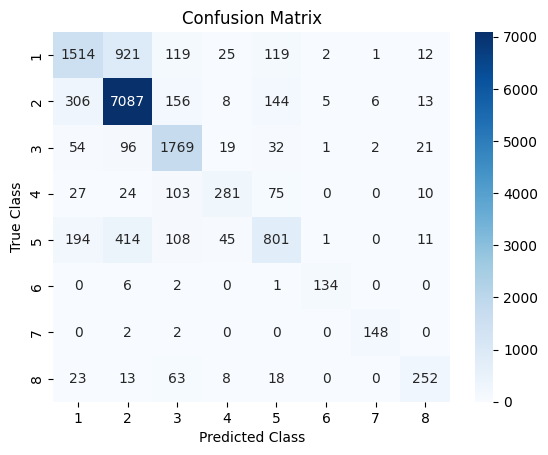

In [7]:
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_order, yticklabels=class_order)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

### Performing the SVM:

In [8]:
def preprocess_data(df):
    # Remove 'ID' and 'Predicted Class' if present
    if 'ID' in df.columns:
        df.drop('ID', axis=1, inplace=True)
    if 'Predicted Class' in df.columns:
        df.drop('Predicted Class', axis=1, inplace=True)

    # Replace NaN values with 0 in all columns
    df.fillna(0, inplace=True)
    
    # Encode categorical variables
    # This function automatically handles the creation of dummy variables for all categorical columns
    categorical_cols = ['SEX', 'POSITION']  # Specify categorical column names
    df = pd.get_dummies(df, columns=categorical_cols)

    # Scale numerical features: 'AGE' and Probabilities
    numeric_features = ['AGE'] + ['Prob_' + str(i) for i in range(1, 9)]
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])
    
    return df

In [9]:
train_df = pd.read_csv('upd_res2_train_images_categorized.csv')
validation_df = pd.read_csv('upd_res2_validation_images_categorized.csv')
test_df = pd.read_csv('upd2_metadataTest.csv')

# Preprocess and save the train, validation, and test datasets
train_df_processed = preprocess_data(train_df)
train_df_processed.to_csv('svm2_train_data.csv', index=False)

validation_df_processed = preprocess_data(validation_df)
validation_df_processed.to_csv('svm2_validation_data.csv', index=False)

test_df_processed = preprocess_data(test_df)
test_df_processed.to_csv('svm2_test_data.csv', index=False)

In [10]:
# Load the data
train_df = pd.read_csv('svm2_train_data.csv')

# Print the column names
print("Column names:", train_df.columns)

# Check if 'CLASS' is in the columns
if 'CLASS' not in train_df.columns:
    print("Error: 'CLASS' column not found.")
else:
    print("'CLASS' column is present.")


Column names: Index(['CLASS', 'AGE', 'Prob_1', 'Prob_2', 'Prob_3', 'Prob_4', 'Prob_5',
       'Prob_6', 'Prob_7', 'Prob_8', 'SEX_0', 'SEX_female', 'SEX_male',
       'POSITION_0', 'POSITION_anterior torso', 'POSITION_head/neck',
       'POSITION_lateral torso', 'POSITION_lower extremity',
       'POSITION_oral/genital', 'POSITION_palms/soles',
       'POSITION_posterior torso', 'POSITION_upper extremity'],
      dtype='object')
'CLASS' column is present.


In [11]:
# Properly define X_train and Y_train
X_train = train_df.drop('CLASS', axis=1)  # Drop the target column to create the feature set
y_train = train_df['CLASS']  # Target variable

# Confirm the setup
print("Features:", X_train.columns)
print("Target set up correctly:", 'CLASS' in y_train.name)

Features: Index(['AGE', 'Prob_1', 'Prob_2', 'Prob_3', 'Prob_4', 'Prob_5', 'Prob_6',
       'Prob_7', 'Prob_8', 'SEX_0', 'SEX_female', 'SEX_male', 'POSITION_0',
       'POSITION_anterior torso', 'POSITION_head/neck',
       'POSITION_lateral torso', 'POSITION_lower extremity',
       'POSITION_oral/genital', 'POSITION_palms/soles',
       'POSITION_posterior torso', 'POSITION_upper extremity'],
      dtype='object')
Target set up correctly: True


Grid search is an exhaustive search method used to identify the optimal hyperparameters for a given model. By systematically exploring a predefined hyperparameter space, it evaluates model performance using cross-validation to find the best combination of parameters. This meticulous approach ensures that the model is fine-tuned for peak accuracy and robustness. The grid search process, therefore, is instrumental in unlocking the full potential of the classifier, ensuring it is configured for optimal predictive performance across all diagnostic classes.

In [12]:
# # Grid search
# param_grid = {
    
#     'gamma': [0.5, 0.1],
#     'kernel': ['poly']
# }

# grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
# grid.fit(X_train, y_train)

# print("Best parameters found: ", grid.best_params_)
# print("Best accuracy found: ", grid.best_score_)

In [13]:
# Initialize the SVM classifier with the optimal parameters found
svm_classifier = SVC(kernel='poly', class_weight='balanced', gamma=0.5, C=10)

# Train the model on the training dataset
svm_classifier.fit(X_train, y_train)

SVC(C=10, class_weight='balanced', gamma=0.5, kernel='poly')

In [14]:
val_df = pd.read_csv('svm2_validation_data.csv')
X_val = val_df.drop('CLASS', axis=1)
y_val = val_df['CLASS']

# Make predictions and evaluate
y_pred = svm_classifier.predict(X_val)
print(f'Accuracy: {accuracy_score(y_val, y_pred)}')
print(classification_report(y_val, y_pred))

Accuracy: 0.7197368421052631
              precision    recall  f1-score   support

           1       0.58      0.59      0.58       678
           2       0.88      0.82      0.85      1932
           3       0.70      0.78      0.74       498
           4       0.50      0.58      0.54       130
           5       0.46      0.56      0.50       394
           6       0.68      0.58      0.63        36
           7       0.80      0.74      0.77        38
           8       0.36      0.31      0.33        94

    accuracy                           0.72      3800
   macro avg       0.62      0.62      0.62      3800
weighted avg       0.73      0.72      0.72      3800



### Evaluation of the SVM's Impact

Handling csv files

In [15]:
test_df = pd.read_csv('svm2_test_data.csv')

# Preparing X_test 
X_test = test_df  # Assuming it's already preprocessed

# Assuming svm_classifier is your trained SVM model
predictions = svm_classifier.predict(X_test)

# Add predictions to the DataFrame
X_test['Predicted CLASS SVM'] = predictions

# Save to a new CSV file
X_test.to_csv('classified_new_data2.csv', index=False)

# Display the DataFrame with predictions
print(X_test[['Predicted CLASS SVM']])

      Predicted CLASS SVM
0                       2
1                       5
2                       5
3                       3
4                       3
...                   ...
6328                    5
6329                    1
6330                    2
6331                    5
6332                    3

[6333 rows x 1 columns]


In [16]:
metadata_df = pd.read_csv('upd2_metadataTest.csv')

# Load the test data with predictions (ensure this file includes the 'Predicted CLASS SVM' column)
X_test = pd.read_csv('classified_new_data2.csv')

# Make sure that both DataFrames have the same number of rows and are properly aligned
if len(metadata_df) == len(X_test):
    # Add the 'Predicted CLASS SVM' column from X_test to metadata_df
    metadata_df['Predicted CLASS SVM'] = X_test['Predicted CLASS SVM']
    
    # Save the updated DataFrame to a new CSV file
    metadata_df.to_csv('updated2_metadataTest.csv', index=False)
    
    # Display the updated DataFrame
    print(metadata_df)
else:
    print("Error: The number of rows in the metadata DataFrame and X_test does not match.")

                ID     SEX   AGE         POSITION  Predicted Class    Prob_1  \
0     ISIC_0055289  female  50.0  lower extremity                2  0.234449   
1     ISIC_0062682    male  65.0  lower extremity                2  0.054073   
2     ISIC_0057706  female  75.0              NaN                5  0.139796   
3     ISIC_0031702    male  70.0        head/neck                3  0.055872   
4     ISIC_0069272    male  60.0  lower extremity                3  0.009892   
...            ...     ...   ...              ...              ...       ...   
6328  ISIC_0028560    male  85.0  upper extremity                5  0.137667   
6329  ISIC_0068188  female  75.0  upper extremity                2  0.411634   
6330  ISIC_0072611  female  50.0      palms/soles                2  0.113011   
6331  ISIC_0032918    male  50.0        head/neck                5  0.281135   
6332  ISIC_0069398  female  30.0   anterior torso                2  0.014715   

        Prob_2    Prob_3        Prob_4 

We conduct a subsequent confusion matrix analysis to discern whether the impact of the misclassifications has been mitigated.

In [17]:
# Load the CSV file
df = pd.read_csv('updated2_metadataTest.csv')

# Assuming 'CLASS' is the actual class label and 'Predicted Class' is the predicted class label
y_true = df['Predicted Class']
y_pred = df['Predicted CLASS SVM']

# Define the order of classes explicitly
class_order = sorted(df['Predicted Class'].unique())

# Compute the confusion matrix with sorted labels
cm = confusion_matrix(y_true, y_pred, labels=class_order)

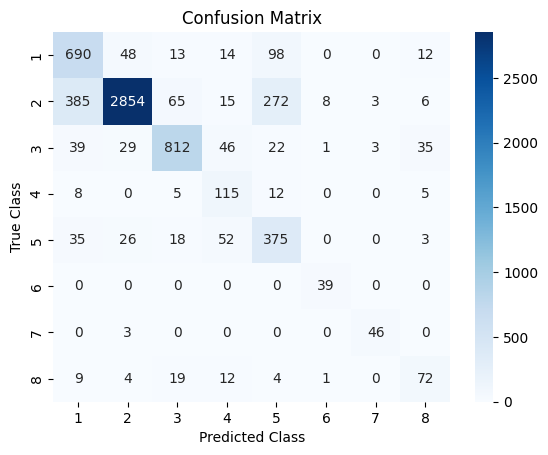

In [18]:
# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_order, yticklabels=class_order)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

Finally, the format of the CSV files is refined to meet the requirements for submission on the Kaggle platform.

In [19]:
# Load the updated metadata CSV file
df = pd.read_csv('updated2_metadataTest.csv')

# Check if 'ID' and 'Predicted CLASS SVM' are in the DataFrame
if 'ID' not in df.columns or 'Predicted CLASS SVM' not in df.columns:
    print("Error: Required columns are missing from the DataFrame.")
else:
    # Select only the 'ID' and 'Predicted CLASS SVM' columns
    submission_df = df[['ID', 'Predicted CLASS SVM']]

    # Rename 'Predicted CLASS SVM' to 'CLASS'
    submission_df = submission_df.rename(columns={'Predicted CLASS SVM': 'CLASS'})

    # Save the new DataFrame to a CSV file
    submission_df.to_csv('Submission5_2.csv', index=False)

    # Print the DataFrame to confirm
    print(submission_df.head())


             ID  CLASS
0  ISIC_0055289      2
1  ISIC_0062682      5
2  ISIC_0057706      5
3  ISIC_0031702      3
4  ISIC_0069272      3


## Bibliography

### 1. **"Conditional Dependence Tests Reveal the Usage of ABCD Rule Features and Bias Variables in Automatic Skin Lesion Classification" ([Reimers et al., 2021](https://typeset.io/papers/conditional-dependence-tests-reveal-the-usage-of-abcd-rule-5eihvfh90j))**:  

This paper investigates whether state-of-the-art deep learning models like ResNet use features from the ABCD rule for diagnosing melanoma or rely on biases. It frames supervised learning as a structural causal model and uses conditional dependence tests to assess feature usage. The results indicate that ResNet models incorporate ABCD rule features (asymmetry, border, and dermoscopic structures) but not color. They also rely on bias features like age, skin color, and colorful patches.

#### Abstract of the Paper
> Skin cancer is the most common form of cancer, and melanoma is the leading cause of cancer-related deaths. To improve the chances of survival, early detection of melanoma is crucial. Automated systems for classifying skin lesions can assist with initial analysis. However, if we expect people to entrust their well-being to an automatic classification algorithm, it is important to ensure that the algorithm makes medically sound decisions. We investigate this question by testing whether two state-of-the-art models use the features defined in the dermoscopic ABCD rule or whether they rely on biases. We use a method that frames supervised learning as a structural causal model, thus reducing the question whether a feature is used to a conditional dependence test. We show that this conditional dependence method yields meaningful results on data from the ISIC archive. Furthermore, we find that the selected models incorporate asymmetry, border, and dermoscopic structures in their decisions but not color. Finally, we show that the same classifiers also use bias features such as the patient’s age, skin color, or the existence of colorful patches.

#### Insights
From the results in this paper, you can conclude that:

1. **ResNet Models and ABCD Rule**:  
   Deep learning models like ResNet are capable of automatically capturing patterns associated with the ABCD rule features without explicitly defining them.

2. **Skipping Explicit ABCD Rule Definition**:  
   Given ResNet's ability to capture these patterns directly, you can skip explicit feature extraction based on the ABCD rule and focus on optimizing the ResNet model for the challenge.

3. **Incorporating Metadata**:  
   Including metadata like age, sex, and anatomical position, which are bias variables that ResNet models also rely on, could further enhance classification performance.

### 2.**"ResNet-SVM: Fusion Based Glioblastoma Tumor Segmentation and Classification" ([Sahli et al., 2022](https://typeset.io/papers/resnet-svm-fusion-based-glioblastoma-tumor-segmentation-and-aa6r1hvl))**:  

This paper presents an automatic approach for glioblastoma brain tumor segmentation using ResNet and SVM. The authors use ResNet for feature extraction and then remove the final layer to feed the extracted features into an SVM classifier. The ResNet-SVM model achieves higher classification accuracy, specificity, and precision for glioblastoma tumor segmentation and classification.


#### Abstract of the Paper
> Computerized segmentation of brain tumor based on magnetic resonance imaging (MRI) data presents an important challenging act in computer vision. In image segmentation, numerous studies have explored the feasibility and advantages of employing deep neural network methods to automatically detect and segment brain tumors depicting on MRI. For training the deeper neural network, the procedure usually requires extensive computational power and it is also very time-consuming due to the complexity and the gradient diffusion difficulty. In order to address and help solve this challenge, we in this study present an automatic approach for Glioblastoma brain tumor segmentation based on deep Residual Learning Network (ResNet) to get over the gradient problem of deep Convolutional Neural Networks (CNNs). Using the extra layers added to a deep neural network, ResNet algorithm can effectively improve the accuracy and the performance, which is useful in solving complex problems with a much rapid training process. An additional method is then proposed to fully automatically classify different brain tumor categories (necrosis, edema, and enhancing regions). Results confirm that the proposed fusion method (ResNet-SVM) has increased classification results of accuracy (AC = 89.36%), specificity (SP = 92.52%) and precision (PR = 90.12%) using 260 MRI data for the training and 112 data used for testing and validation of Glioblastoma tumor cases. Compared to the state-of-the art methods, the proposed scheme provides a higher performance by identifying Glioblastoma tumor type.


#### Insights

1. **ResNet Models and Feature Extraction**:  
   ResNet models are effective in extracting high-quality features that can improve classification performance, especially when combined with other classifiers.

2. **Skipping Explicit ABCD Rule Definition**:  
   By using ResNet models for feature extraction, you can skip explicit feature extraction based on the ABCD rule and directly classify lesions using a secondary classifier like an SVM.

3. **Combining Classifiers**:  
   The fusion method of combining ResNet and SVM (ResNet-SVM) shows increased classification results and can outperform the state-of-the-art in glioblastoma tumor segmentation and classification.

### 3. **"Revisited Otsu Algorithm for Skin Cancer Segmentation" ([Tom & Daba, 2023](https://typeset.io/papers/revisited-otsu-algorithm-for-skin-cancer-segmentation-3fto4nhe))**:  

This paper explores a revisited OTSU algorithm for skin cancer segmentation. It addresses the detection of pigmented skin lesions for melanoma diagnosis using computer-aided technology. The authors implement a color-based method using a revisited OTSU thresholding segmentation scheme, achieving promising results with an 80% accuracy detection rate.


#### Abstract of the Paper
> Computer-aided technology can be used to perform a quantitative and objective evaluation of pigmented skin lesions during the clinical assessment procedure. This helps to expedite the procedure. The growing development of non-invasive techniques can be of significant benefit in the early identification of malignant melanoma, which can, in turn, help to minimize the necessity for invasive biopsies. The system is primarily focused on two principal schemes: Establishing an effective lesion border detection method and then creating an efficient classification scheme. We address two primary areas in this work. First, we study skin lesion detection to analyze any sign of malignancy for skin cancer diagnosis. This is followed by the system implementation of a color-based method for all the images from the RGB color space using a revisited OTSU thresholding segmentation scheme. The results proved to be promising with at least an 80% accuracy detection rate for a wide range of clinical skin lesion images.


#### Insights

1. **ResNet Models and Segmentation**:  
   ResNet models are effective for skin lesion segmentation but can benefit from pre-segmentation methods like the revisited OTSU algorithm.

2. **Skipping Explicit ABCD Rule Definition**:  
   The revisited OTSU algorithm accurately detects lesion borders (as in the Border feature of ABCD), allowing ResNet models to focus on other features without explicitly extracting ABCD rule features.

3. **Lesion Detection Methodology**:  
   The revisited OTSU thresholding segmentation scheme combined with ResNet classification shows promising results in accurate lesion detection.

### Summary table 


| No. | Paper Title & Author (Year) | Insights | 
| --- | --------------------------- | -------- | 
| 1   | [Conditional Dependence Tests Reveal the Usage of ABCD Rule Features and Bias Variables in Automatic Skin Lesion Classification (Reimers et al., 2021)](https://typeset.io/papers/conditional-dependence-tests-reveal-the-usage-of-abcd-rule-5eihvfh90j) | Deep learning models capture ABCD rule patterns without explicit feature extraction |
| 2   | [ResNet-SVM: Fusion Based Glioblastoma Tumor Segmentation and Classification (Sahli et al., 2022)](https://typeset.io/papers/resnet-svm-fusion-based-glioblastoma-tumor-segmentation-and-aa6r1hvl) | Removes ResNet final layer to use an SVM for classification | 
| 3   | [Revisited Otsu Algorithm for Skin Cancer Segmentation (Tom & Daba, 2023)](https://typeset.io/papers/revisited-otsu-algorithm-for-skin-cancer-segmentation-3fto4nhe) | Uses a revisited OTSU thresholding algorithm for accurate skin lesion segmentation | 


### Additional Bibliography


[**Automated melanoma recognition**](http://ieeexplore.ieee.org/document/918473)  

[**Computerized analysis of pigmented skin lesions: A review**](https://www.sciencedirect.com/science/article/pii/S0933365712001108#bib0180)  

[**A computational approach for detecting pigmented skin lesions in macroscopic images**](https://www.sciencedirect.com/science/article/pii/S0957417416302354#bib0023)  

[**Performance of a dermoscopy-based computer vision system for the diagnosis of pigmented skin lesions compared with visual evaluation by experienced dermatologists**](https://www.sciencedirect.com/science/article/pii/S0933365713001589)  

[**Dermatologist-level classification of skin cancer with deep neural networks**](https://www.nature.com/articles/nature21056)  

[**Classification of Melanoma Lesions Using Sparse Coded Features and Random Forests**](https://hal-univ-bourgogne.archives-ouvertes.fr/hal-01250955/document)  

[**Sixth ISIC Skin Image Analysis Workshop @ CVPR 2021 Virtual**](https://workshop2021.isic-archive.com/)  

[**Research Datasets for Skin Image Analysis**](https://workshop2020.isic-archive.com/#paper)  